APPROACH-
1. Identify NULL values in each column and respective counts
2. Identify dtype of columns
3. Dummification for categorical variable. Filling NULL values with Most frequent values of respective columns, This will be done in two steps.
    * Fill the NULL of categorical features and put the label on them. This will enrich our data for most frequent column
    * Fill the NULL of remaining features (Numerical).
4. Split data for training 
5. Apply classification algorithm and evaluate the performance.

In [32]:
#DATA PROCESSING

import pandas as pd
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")  # To ignore warnings
sns.set(rc={"figure.figsize":(12,8)})  # Set figure size to 12,8

In [33]:
pd.options.display.max_columns=150   # to display all columns

In [34]:
# to run the code line by line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"#run single line code

In [35]:
col_names = ['surgery','age','hospital_number','rectal_temp','pulse','respiratory_rate','temp_of_extremities',
                                               'peripheral_pulse', 'mucous_membrane','capillary_refill_time','pain','peristalsis','abdominal_distension',
             'nasogastric_reflux','nasogastric_reflux_ph','rectal_exam_feces','abdomen','packed_cell_volume','total_protein',
                                                        'abdomo_appearance', 'abdomo_protein','outcome','surgical_lesion','lesion_1','lesion_2','lesion_3','cp_data']

In [36]:
#Read the data
data=pd.read_csv("Horse Colic.csv")
print(data)

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0              

In [37]:
test=pd.read_csv("Horse Colic.csv")
print(test)

    surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0              

In [38]:
data

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,533886,NaN,120.0,70.0,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,NaN,NaN,NaN,NaN,distend_large,55.0,65.0,NaN,NaN,euthanized,no,3205,0,0,no
295,no,adult,527702,37.2,72.0,24.0,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,44.0,NaN,serosanguious,3.3,euthanized,yes,2208,0,0,yes
296,yes,adult,529386,37.5,72.0,30.0,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,moderate,slight,none,NaN,decreased,distend_large,60.0,6.8,NaN,NaN,died,yes,3205,0,0,no
297,yes,adult,530612,36.5,100.0,24.0,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,moderate,significant,none,NaN,absent,distend_small,50.0,6.0,serosanguious,3.4,lived,yes,2208,0,0,yes


In [39]:
df=data.copy()

In [40]:
test=test.copy()

In [41]:
df.shape

(299, 28)

In [42]:
df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [43]:
df.dtypes.value_counts()

object     17
float64     7
int64       4
dtype: int64

In [44]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [45]:
dele_col=df.columns[(df.isnull().sum()*100)/df.shape[0]>40]
dele_col

Index(['nasogastric_reflux_ph', 'abdomo_appearance', 'abdomo_protein'], dtype='object')

In [46]:
df=df.drop(dele_col,axis=1)

In [47]:
num_cols=['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',  'packed_cell_volume',
 'total_protein', 'lesion_1','lesion_2','lesion_3']

In [48]:
num_df=df[num_cols]
num_df

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,45.0,8.4,11300,0,0
1,534817,39.2,88.0,20.0,50.0,85.0,2208,0,0
2,530334,38.3,40.0,24.0,33.0,6.7,0,0,0
3,5290409,39.1,164.0,84.0,48.0,7.2,2208,0,0
4,530255,37.3,104.0,35.0,74.0,7.4,4300,0,0
...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,55.0,65.0,3205,0,0
295,527702,37.2,72.0,24.0,44.0,NaN,2208,0,0
296,529386,37.5,72.0,30.0,60.0,6.8,3205,0,0
297,530612,36.5,100.0,24.0,50.0,6.0,2208,0,0


In [49]:
num_test=test[num_cols]
num_test

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
0,530101,38.5,66.0,28.0,45.0,8.4,11300,0,0
1,534817,39.2,88.0,20.0,50.0,85.0,2208,0,0
2,530334,38.3,40.0,24.0,33.0,6.7,0,0,0
3,5290409,39.1,164.0,84.0,48.0,7.2,2208,0,0
4,530255,37.3,104.0,35.0,74.0,7.4,4300,0,0
...,...,...,...,...,...,...,...,...,...
294,533886,NaN,120.0,70.0,55.0,65.0,3205,0,0
295,527702,37.2,72.0,24.0,44.0,NaN,2208,0,0
296,529386,37.5,72.0,30.0,60.0,6.8,3205,0,0
297,530612,36.5,100.0,24.0,50.0,6.0,2208,0,0


In [50]:
cat_cols= ['surgery','age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 
           'pain', 'peristalsis','rectal_exam_feces', 'abdomen',  
           'outcome', 'surgical_lesion', 'cp_data']

In [58]:
cat_df=df[cat_cols]
cat_df

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,decreased,distend_large,died,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,absent,other,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,normal,normal,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,decreased,NaN,died,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,distend_large,euthanized,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,absent,distend_small,euthanized,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,decreased,distend_large,died,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,absent,distend_small,lived,yes,yes


In [59]:
cat_test=test[cat_cols]
cat_test

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data
0,no,adult,cool,reduced,NaN,more_3_sec,extreme_pain,absent,decreased,distend_large,died,no,no
1,yes,adult,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,absent,other,euthanized,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,normal,normal,lived,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,decreased,NaN,died,yes,yes
4,no,adult,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,died,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,yes,adult,cold,NaN,pale_cyanotic,more_3_sec,depressed,absent,NaN,distend_large,euthanized,no,no
295,no,adult,cool,increased,pale_cyanotic,more_3_sec,severe_pain,hypomotile,absent,distend_small,euthanized,yes,yes
296,yes,adult,cold,reduced,pale_cyanotic,less_3_sec,severe_pain,absent,decreased,distend_large,died,yes,no
297,yes,adult,cool,reduced,pale_pink,less_3_sec,mild_pain,hypomotile,absent,distend_small,lived,yes,yes


In [60]:
cat_df.isnull().sum()

surgery                    0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
rectal_exam_feces        102
abdomen                  118
outcome                    0
surgical_lesion            0
cp_data                    0
dtype: int64

In [61]:
cat_test.isnull().sum()

surgery                    0
age                        0
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
rectal_exam_feces        102
abdomen                  118
outcome                    0
surgical_lesion            0
cp_data                    0
dtype: int64

In [62]:
## fill na values 
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')

imputed_data = imputer.fit_transform(cat_df)

imputed_data=pd.DataFrame(imputed_data,columns=cat_df.columns)

print(imputed_data.isnull().sum())

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
rectal_exam_feces        0
abdomen                  0
outcome                  0
surgical_lesion          0
cp_data                  0
dtype: int64


In [63]:
imputed_test = imputer.fit_transform(cat_test)

imputed_test=pd.DataFrame(imputed_test,columns=cat_test.columns)

print(imputed_test.isnull().sum())

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
rectal_exam_feces        0
abdomen                  0
outcome                  0
surgical_lesion          0
cp_data                  0
dtype: int64


In [64]:
cols= imputed_data.columns

imputed_data[cols] = imputed_data[cols].astype("category")

print(imputed_data.dtypes)

surgery                  category
age                      category
temp_of_extremities      category
peripheral_pulse         category
mucous_membrane          category
capillary_refill_time    category
pain                     category
peristalsis              category
rectal_exam_feces        category
abdomen                  category
outcome                  category
surgical_lesion          category
cp_data                  category
dtype: object


In [65]:
cols= imputed_test.columns

imputed_test[cols] = imputed_test[cols].astype("category")

print(imputed_test.dtypes)

surgery                  category
age                      category
temp_of_extremities      category
peripheral_pulse         category
mucous_membrane          category
capillary_refill_time    category
pain                     category
peristalsis              category
rectal_exam_feces        category
abdomen                  category
outcome                  category
surgical_lesion          category
cp_data                  category
dtype: object


In [66]:
imput=SimpleImputer(strategy="mean")

imput_data = imput.fit_transform(num_df)

imput_data=pd.DataFrame(imput_data,columns=num_df.columns)

print(imput_data.isnull().sum())

hospital_number       0
rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
lesion_1              0
lesion_2              0
lesion_3              0
dtype: int64


In [67]:
imput_test = imput.fit_transform(num_test)

imput_test=pd.DataFrame(imput_test,columns=num_test.columns)

print(imput_test.isnull().sum())

hospital_number       0
rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
lesion_1              0
lesion_2              0
lesion_3              0
dtype: int64


In [68]:
for col in imputed_data.columns.values:
    imputed_data[col]=imputed_data[col].astype('category').cat.codes

In [69]:
for col in imputed_test.columns.values:
    imputed_test[col]=imputed_test[col].astype('category').cat.codes

FINAL

In [70]:
df_merge=pd.concat([imputed_data,imput_data],axis=1)

In [71]:
df_merge

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
0,0,0,1,3,3,2,2,0,1,0,0,0,0,530101.0,38.500000,66.0,28.0,45.0,8.400000,11300.0,0.0,0.0
1,1,0,1,2,4,1,3,0,0,4,1,0,0,534817.0,39.200000,88.0,20.0,50.0,85.000000,2208.0,0.0,0.0
2,0,0,2,2,5,1,3,2,3,3,2,0,1,530334.0,38.300000,40.0,24.0,33.0,6.700000,0.0,0.0,0.0
3,1,1,0,2,2,2,1,0,1,0,0,1,1,5290409.0,39.100000,164.0,84.0,48.0,7.200000,2208.0,0.0,0.0
4,0,0,1,2,2,2,3,2,0,0,0,0,0,530255.0,37.300000,104.0,35.0,74.0,7.400000,4300.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0,2,4,2,1,0,0,0,1,0,0,533886.0,38.168619,120.0,70.0,55.0,65.000000,3205.0,0.0,0.0
295,0,0,1,1,4,2,4,2,0,1,1,1,1,527702.0,37.200000,72.0,24.0,44.0,24.274436,2208.0,0.0,0.0
296,1,0,0,3,4,1,4,0,1,0,0,1,0,529386.0,37.500000,72.0,30.0,60.0,6.800000,3205.0,0.0,0.0
297,1,0,1,3,5,1,3,2,0,1,2,1,1,530612.0,36.500000,100.0,24.0,50.0,6.000000,2208.0,0.0,0.0


In [72]:
df_merge.isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
rectal_exam_feces        0
abdomen                  0
outcome                  0
surgical_lesion          0
cp_data                  0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
packed_cell_volume       0
total_protein            0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [73]:
dff=df_merge.copy()

In [74]:
dff.columns

Index(['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'rectal_exam_feces', 'abdomen', 'outcome', 'surgical_lesion', 'cp_data',
       'hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate',
       'packed_cell_volume', 'total_protein', 'lesion_1', 'lesion_2',
       'lesion_3'],
      dtype='object')

In [75]:
dff.shape

(299, 22)

TEST

In [76]:
test_merge=pd.concat([imputed_test,imput_test],axis=1)
test_merge

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,rectal_exam_feces,abdomen,outcome,surgical_lesion,cp_data,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,lesion_1,lesion_2,lesion_3
0,0,0,1,3,3,2,2,0,1,0,0,0,0,530101.0,38.500000,66.0,28.0,45.0,8.400000,11300.0,0.0,0.0
1,1,0,1,2,4,1,3,0,0,4,1,0,0,534817.0,39.200000,88.0,20.0,50.0,85.000000,2208.0,0.0,0.0
2,0,0,2,2,5,1,3,2,3,3,2,0,1,530334.0,38.300000,40.0,24.0,33.0,6.700000,0.0,0.0,0.0
3,1,1,0,2,2,2,1,0,1,0,0,1,1,5290409.0,39.100000,164.0,84.0,48.0,7.200000,2208.0,0.0,0.0
4,0,0,1,2,2,2,3,2,0,0,0,0,0,530255.0,37.300000,104.0,35.0,74.0,7.400000,4300.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1,0,0,2,4,2,1,0,0,0,1,0,0,533886.0,38.168619,120.0,70.0,55.0,65.000000,3205.0,0.0,0.0
295,0,0,1,1,4,2,4,2,0,1,1,1,1,527702.0,37.200000,72.0,24.0,44.0,24.274436,2208.0,0.0,0.0
296,1,0,0,3,4,1,4,0,1,0,0,1,0,529386.0,37.500000,72.0,30.0,60.0,6.800000,3205.0,0.0,0.0
297,1,0,1,3,5,1,3,2,0,1,2,1,1,530612.0,36.500000,100.0,24.0,50.0,6.000000,2208.0,0.0,0.0


In [77]:
test_merge.isnull().sum()

surgery                  0
age                      0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
rectal_exam_feces        0
abdomen                  0
outcome                  0
surgical_lesion          0
cp_data                  0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
packed_cell_volume       0
total_protein            0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

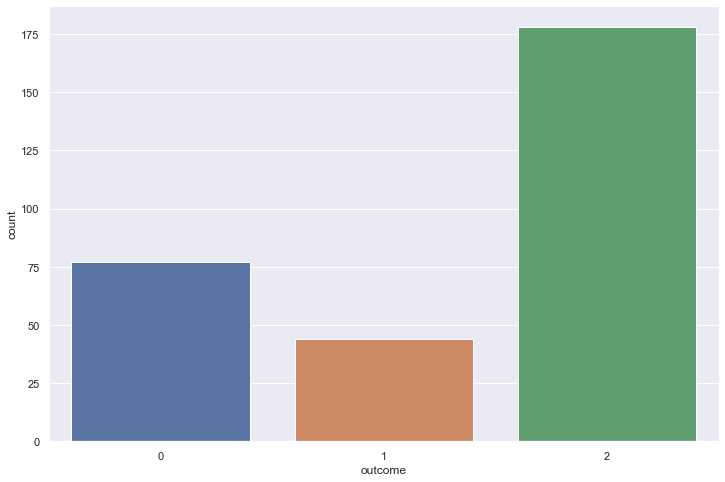

In [89]:
sns.countplot(data=dff, x='outcome');

In [91]:
from matplotlib import pyplot as plt

2    178
0     77
1     44
Name: outcome, dtype: int64


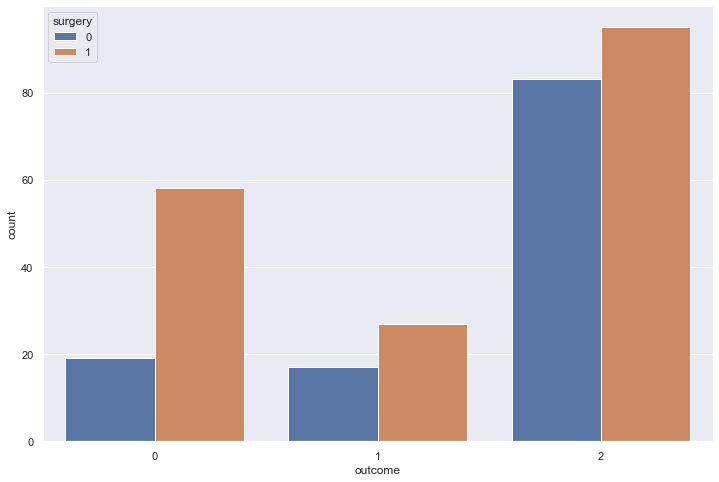

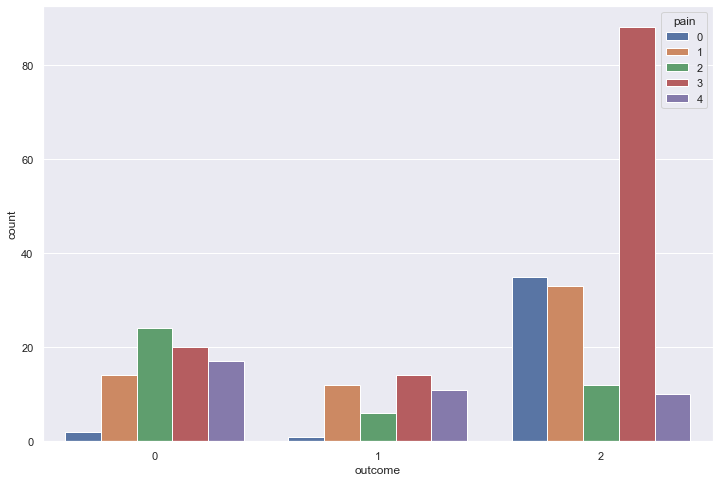

Text(0.5, 0.98, 'Horse deaths by Pain & Surgery')

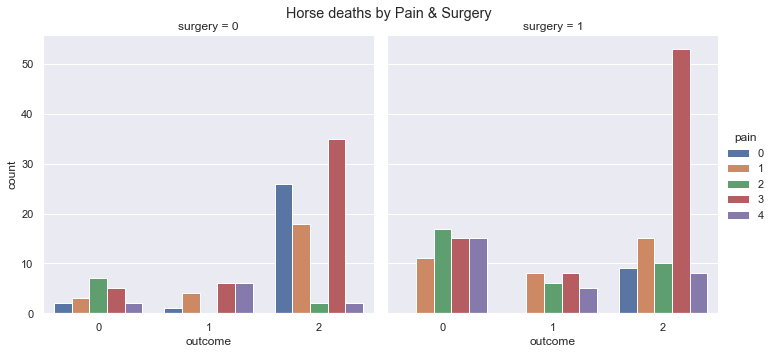

In [92]:
print(dff.outcome.value_counts())

sns.countplot(data=dff, x='outcome', hue='surgery');
plt.show()

sns.countplot(data=dff, x='outcome', hue='pain');
plt.show()

g = sns.catplot(data=dff, x='outcome', col='surgery', hue='pain', kind='count');
g.fig.suptitle('Horse deaths by Pain & Surgery');
plt.subplots_adjust(top=0.9)

Text(0.5, 0.98, 'Horse deaths by Pain & Age')

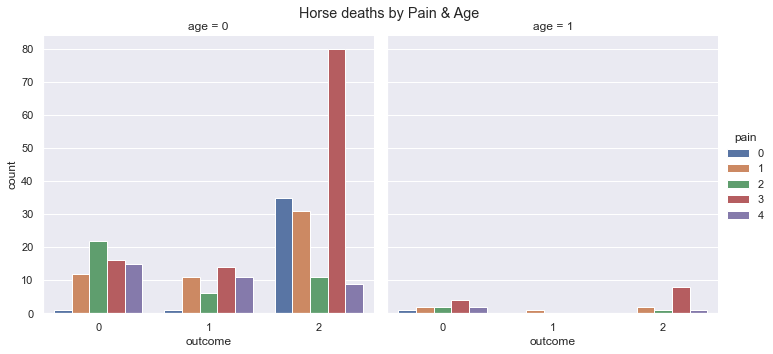

In [94]:
g = sns.catplot(data=dff, x='outcome', hue='pain', col='age', kind='count');
g.fig.suptitle('Horse deaths by Pain & Age');
plt.subplots_adjust(top=0.9)

TRAIN TEST SPLIT

In [78]:
# convert target variable into x,y
y=dff['outcome']
X=dff.drop(['outcome'],axis=1)

In [79]:
test_merge=test_merge.drop(['outcome'],axis=1)

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_train,  X_val, y_train,y_val = train_test_split(X, y, stratify=y,test_size = 0.30, random_state = 222)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((209, 21), (90, 21), (209,), (90,))

MODELS

In [82]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [83]:
LRC = LogisticRegression()#solver='newton-cg',max_iter=500

LRC.fit(X_train, y_train)
y_pred_LRC = LRC.predict(X_val)

print(classification_report(y_val, y_pred_LRC))

LogisticRegression()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.00      0.00      0.00        13
           2       0.58      0.89      0.70        54

    accuracy                           0.53        90
   macro avg       0.19      0.30      0.23        90
weighted avg       0.35      0.53      0.42        90



DECISION TREE

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
DTC = DecisionTreeClassifier()#criterion = 'entropy', max_features = 'sqrt', max_depth = 15, random_state = 0

DTC.fit(X_train, y_train)
y_pred_DT = DTC.predict(X_val)

print(classification_report(y_val, y_pred_DT))

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.56      0.43      0.49        23
           1       0.21      0.23      0.22        13
           2       0.71      0.76      0.73        54

    accuracy                           0.60        90
   macro avg       0.49      0.47      0.48        90
weighted avg       0.60      0.60      0.60        90



RANDOM FOREST

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rfc11 = RandomForestClassifier()#n_estimators = 1500, class_weight="balanced"

rfc11.fit(X_train, y_train)
y_pred_test_RF1 = rfc11.predict(X_val)

print(classification_report(y_val, y_pred_test_RF1))

RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.61      0.48      0.54        23
           1       0.67      0.15      0.25        13
           2       0.71      0.91      0.80        54

    accuracy                           0.69        90
   macro avg       0.66      0.51      0.53        90
weighted avg       0.68      0.69      0.65        90



In [88]:
rfc111 = RandomForestClassifier(n_estimators = 2500, class_weight="balanced")#

rfc111.fit(X_train, y_train)
y_pred_test_RF11 = rfc111.predict(X_val)

print(classification_report(y_val, y_pred_test_RF11))

RandomForestClassifier(class_weight='balanced', n_estimators=2500)

              precision    recall  f1-score   support

           0       0.80      0.52      0.63        23
           1       0.80      0.31      0.44        13
           2       0.73      0.94      0.82        54

    accuracy                           0.74        90
   macro avg       0.78      0.59      0.63        90
weighted avg       0.76      0.74      0.72        90

